In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_wages = pd.read_csv("/Users/kartikayluthra/Desktop/anthropic economic index/data/wage_data.csv")

In [3]:
df_wages.head()

,SOCcode,JobName,JobFamily,isBright,isGreen,JobZone,MedianSalary,JobForecast,ChanceAuto,WageGroup
0,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.00,146000,-1.0,Accountants and Auditors
1,13-2011.00,Accountants and Auditors,Business and Financial Operations,True,False,-1,70500.00,146000,94.0,NaN
2,27-2011.00,Actors,"Arts, Design, Entertainment, Sports, and Media",False,False,2,17.54,7700,37.0,NaN
3,15-2011.00,Actuaries,Computer and Mathematical,True,False,4,102880.00,2200,21.0,NaN
4,29-1199.01,Acupuncturists,Healthcare Practitioners and Technical,True,False,5,73960.00,3400,-1.0,"Health Diagnosing and Treating Practitioners, ..."


In [4]:
df_soc = pd.read_csv("/Users/kartikayluthra/Desktop/anthropic economic index/data/SOC_Structure.csv")
df_soc.head()
df_soc.rename(columns={"Detailed O*NET-SOC": "SOCcode"}, inplace=True)


In [5]:
df_merged = df_wages.merge(df_soc, on='SOCcode', how='left')


In [6]:
df_merged.head()

,SOCcode,JobName,JobFamily,isBright,isGreen,JobZone,MedianSalary,JobForecast,ChanceAuto,WageGroup,Major Group,Minor Group,Broad Occupation,Detailed Occupation,SOC or O*NET-SOC 2019 Title
0,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.00,146000,-1.0,Accountants and Auditors,NaN,NaN,NaN,NaN,NaN
1,13-2011.00,Accountants and Auditors,Business and Financial Operations,True,False,-1,70500.00,146000,94.0,NaN,NaN,NaN,NaN,NaN,NaN
2,27-2011.00,Actors,"Arts, Design, Entertainment, Sports, and Media",False,False,2,17.54,7700,37.0,NaN,NaN,NaN,NaN,NaN,NaN
3,15-2011.00,Actuaries,Computer and Mathematical,True,False,4,102880.00,2200,21.0,NaN,NaN,NaN,NaN,NaN,NaN
4,29-1199.01,Acupuncturists,Healthcare Practitioners and Technical,True,False,5,73960.00,3400,-1.0,"Health Diagnosing and Treating Practitioners, ...",NaN,NaN,NaN,NaN,NaN


In [7]:
df_task_statements = pd.read_csv("/Users/kartikayluthra/Desktop/anthropic economic index/data/onet_task_statements.csv")

In [8]:
df_task_statements.head()

,O*NET-SOC Code,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,Core,87.0,07/2014,Incumbent
1,11-1011.00,Chief Executives,8831,Appoint department heads or managers and assig...,Core,87.0,07/2014,Incumbent
2,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,Core,87.0,07/2014,Incumbent
3,11-1011.00,Chief Executives,8826,"Direct, plan, or implement policies, objective...",Core,87.0,07/2014,Incumbent
4,11-1011.00,Chief Executives,8827,"Prepare budgets for approval, including those ...",Core,87.0,07/2014,Incumbent


In [9]:
df_task_statements.rename(columns = {'O*NET-SOC Code': 'SOCcode'}, inplace = True)

In [10]:
df_merged_again = df_merged.merge(df_task_statements, on = 'SOCcode', how = 'left')

In [11]:
df_merged_again.head()

,SOCcode,JobName,JobFamily,isBright,isGreen,JobZone,MedianSalary,JobForecast,ChanceAuto,WageGroup,...,Broad Occupation,Detailed Occupation,SOC or O*NET-SOC 2019 Title,Title,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.0,146000,-1.0,Accountants and Auditors,...,NaN,NaN,NaN,Accountants,112.0,"Prepare, examine, or analyze accounting record...",Core,190.0,06/2009,Incumbent
1,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.0,146000,-1.0,Accountants and Auditors,...,NaN,NaN,NaN,Accountants,115.0,Report to management regarding the finances of...,Core,192.0,06/2009,Incumbent
2,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.0,146000,-1.0,Accountants and Auditors,...,NaN,NaN,NaN,Accountants,116.0,Establish tables of accounts and assign entrie...,Core,192.0,06/2009,Incumbent
3,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.0,146000,-1.0,Accountants and Auditors,...,NaN,NaN,NaN,Accountants,118.0,"Develop, implement, modify, and document recor...",Core,192.0,06/2009,Incumbent
4,13-2011.01,Accountants,Business and Financial Operations,True,False,4,70500.0,146000,-1.0,Accountants and Auditors,...,NaN,NaN,NaN,Accountants,113.0,"Compute taxes owed and prepare tax returns, en...",Supplemental,192.0,06/2009,Incumbent


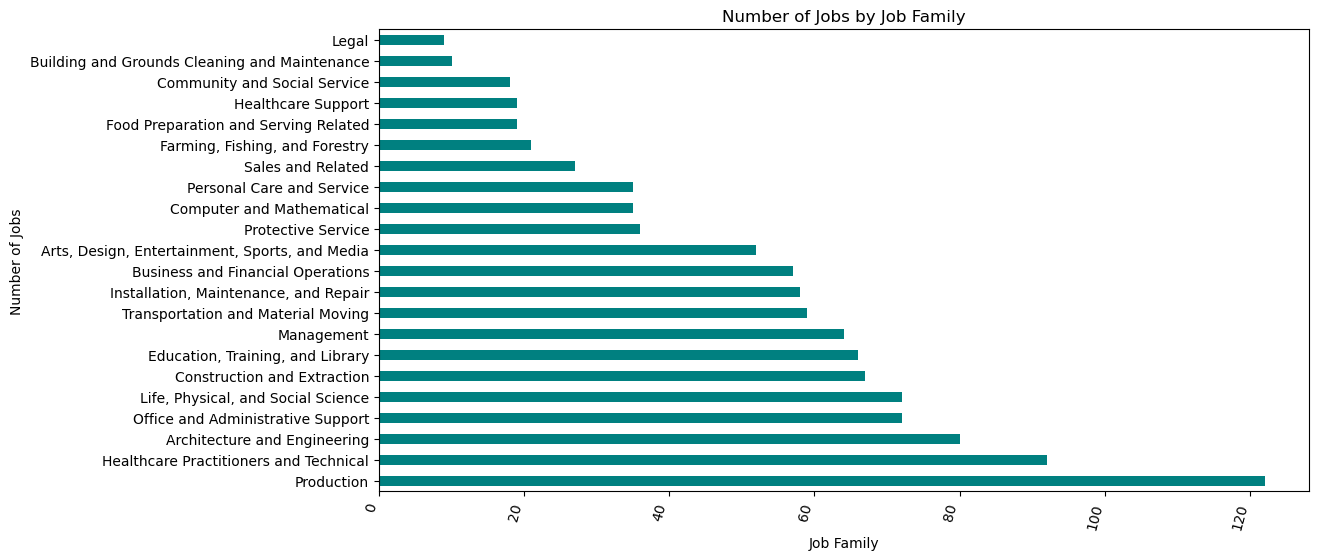

In [12]:
job_family_counts = df_wages['JobFamily'].value_counts()
job_family_counts.plot(kind='barh', figsize=(12,6), color='teal')
plt.title("Number of Jobs by Job Family")
plt.xlabel("Job Family")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=75, ha='right')
plt.show()